In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [63]:
df=pd.read_csv('Heart.csv')

In [64]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [65]:
df.shape

(1025, 14)

In [66]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [68]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [69]:
# Descriptive statistics of the data set accessed.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [70]:
df.isnull().head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [72]:
df_copy = df.copy(deep = True)
df_copy[['cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']] = df_copy[['cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

age           0
sex           0
cp          497
trestbps      0
chol          0
fbs         872
restecg     497
thalach       0
exang       680
oldpeak     329
slope        74
ca          578
thal          7
target        0
dtype: int64


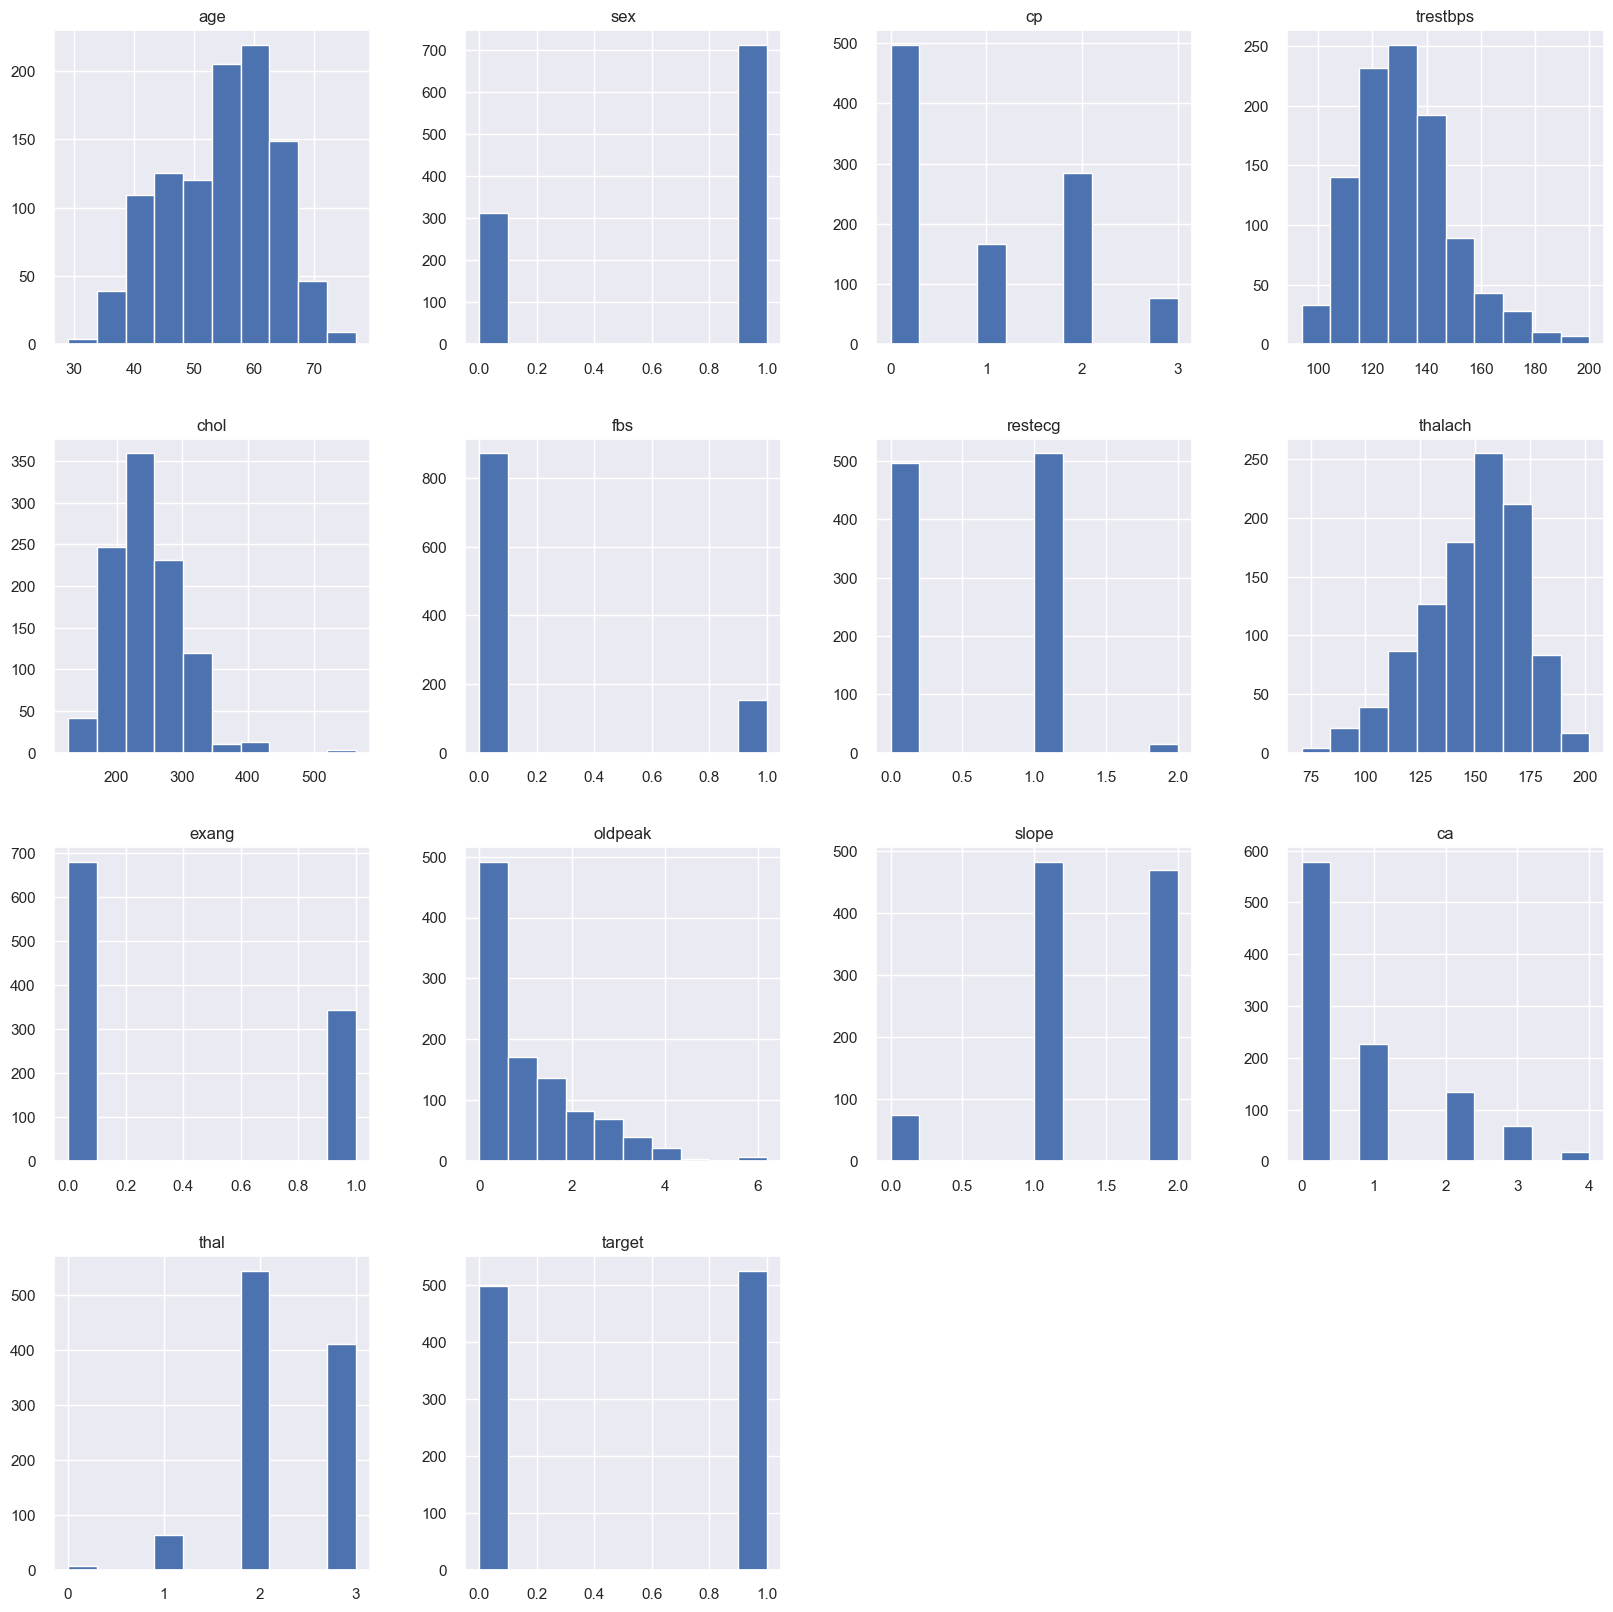

In [73]:
#Plotting the data distribution plots before removing null values
p = df.hist(figsize = (20,20))

In [74]:
# imputing the mean value of the column to each missing value of that particular column.
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

KeyError: 'Glucose'

In [ ]:
#Plotting the distributions after removing the NAN values.
p = df_copy.hist(figsize = (20,20))

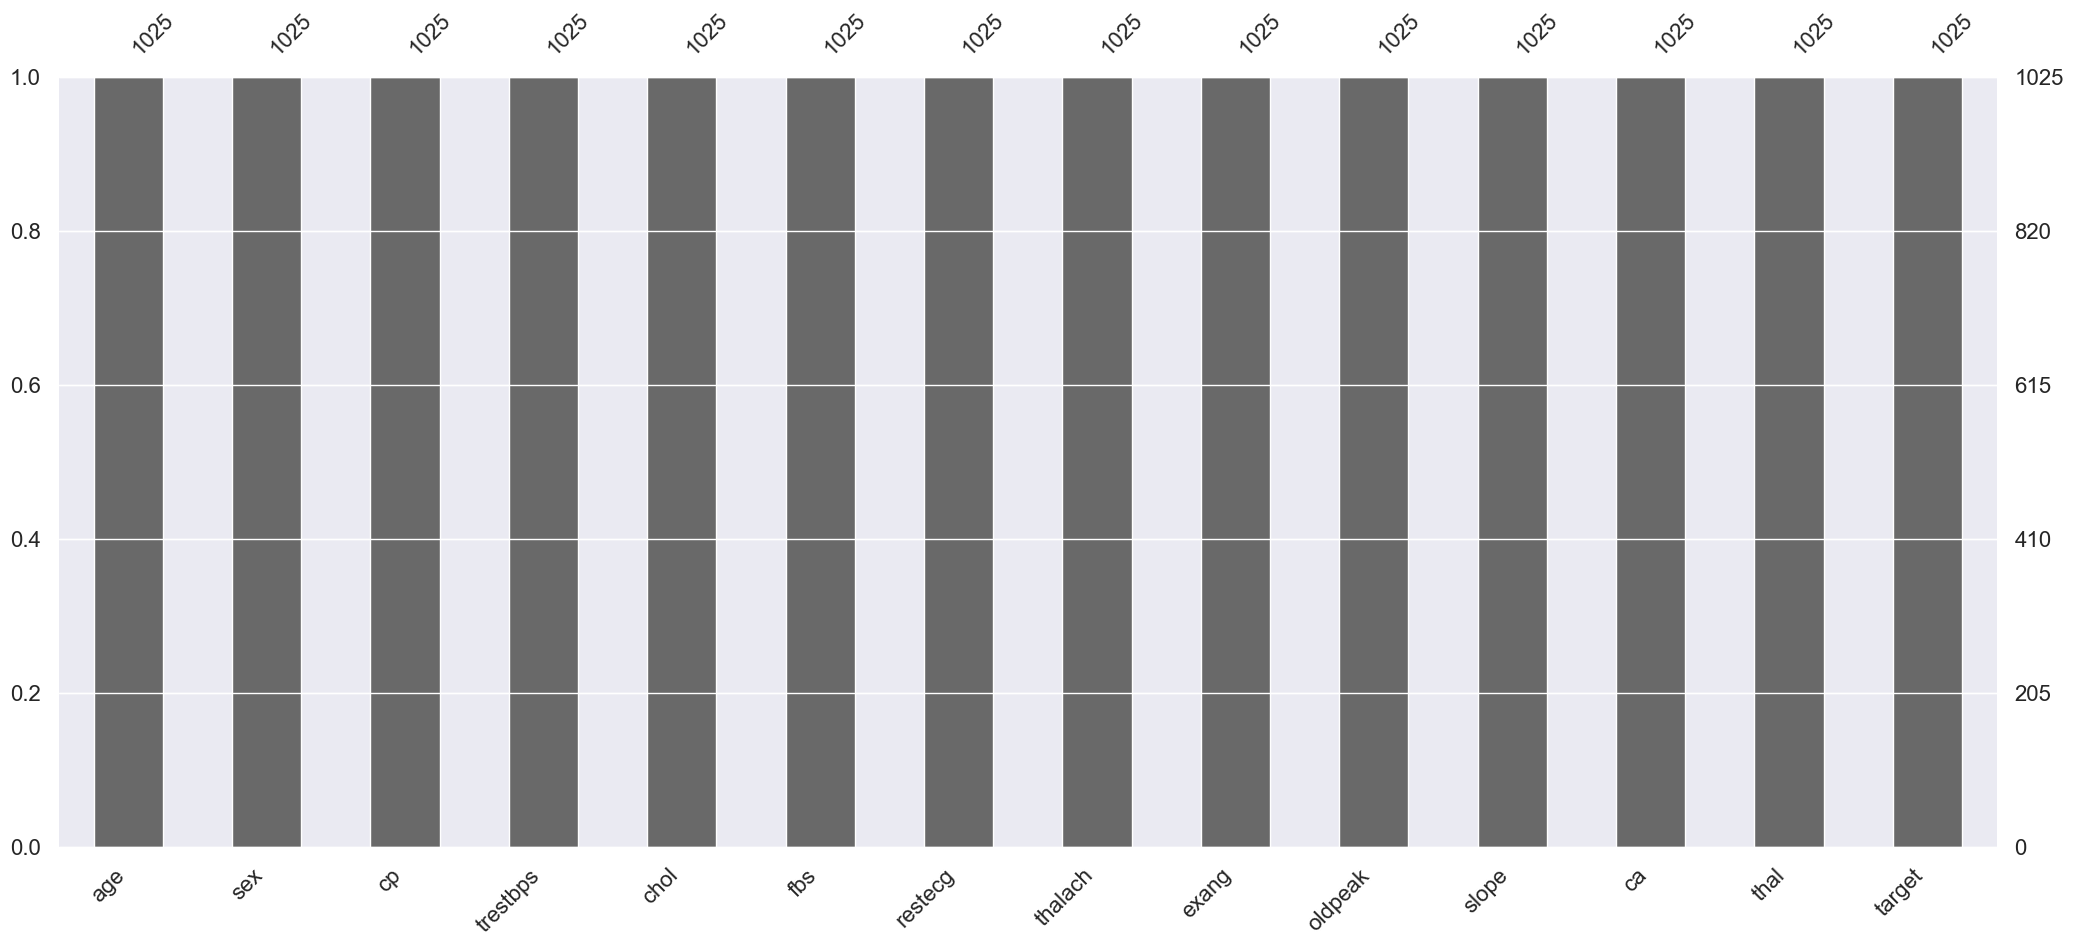

In [75]:
#Plotting Null Count Analysis Plot
p = msno.bar(df)

In [76]:
#how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

KeyError: 'Outcome'

In [ ]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

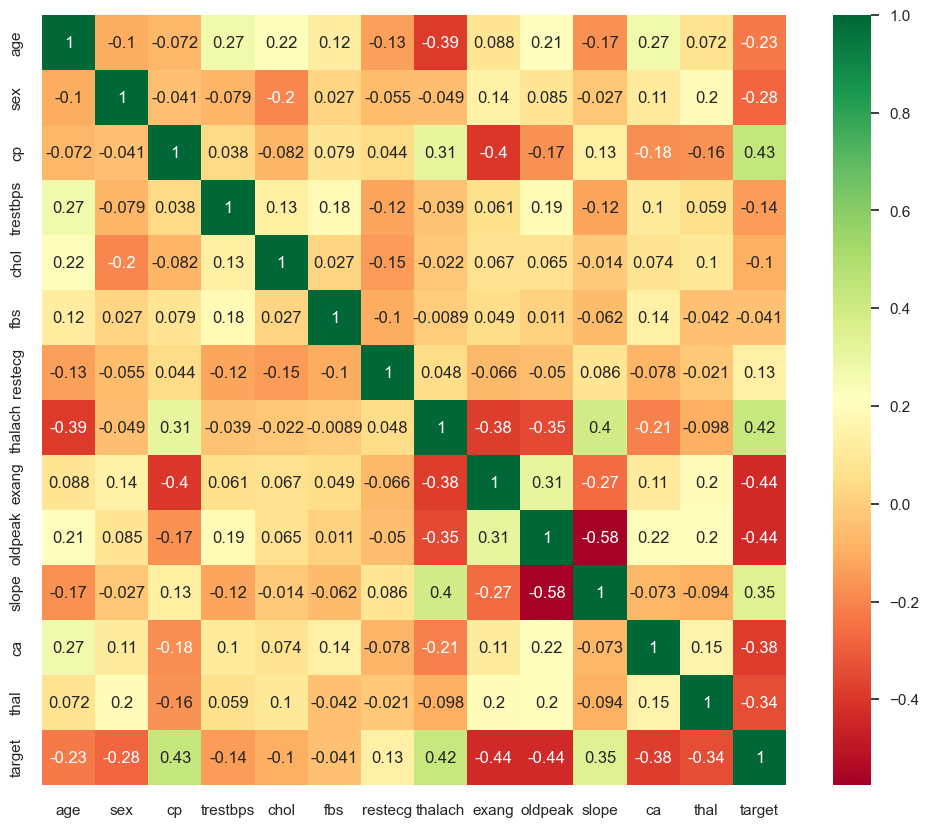

In [77]:
#Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [78]:
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,NaN,125,212,NaN,1.0,168,NaN,1.0,2.0,2.0,3.0,0
1,53,1,NaN,140,203,1.0,NaN,155,1.0,3.1,NaN,NaN,3.0,0
2,70,1,NaN,145,174,NaN,1.0,125,1.0,2.6,NaN,NaN,3.0,0
3,61,1,NaN,148,203,NaN,1.0,161,NaN,NaN,2.0,1.0,3.0,0
4,62,0,NaN,138,294,1.0,1.0,106,NaN,1.9,1.0,3.0,2.0,0


In [79]:
#After Standard scaling
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["target"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

ValueError: Shape of passed values is (1025, 13), indices imply (1025, 8)

In [80]:
#explore our target column
y = df_copy.target
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [81]:
#Model Building,Splitting the dataset
X = df.drop('target', axis=1)
y = df['target']

1    526
0    499
Name: target, dtype: int64


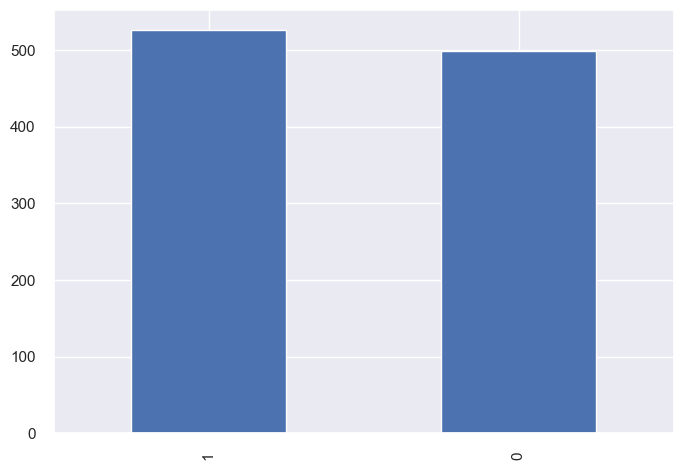

In [82]:
#how well our target column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["target"].map(lambda x: color_wheel.get(x + 1))
print(df.target.value_counts())
p=df.target.value_counts().plot(kind="bar")

TypeError: countplot() got multiple values for argument 'data'

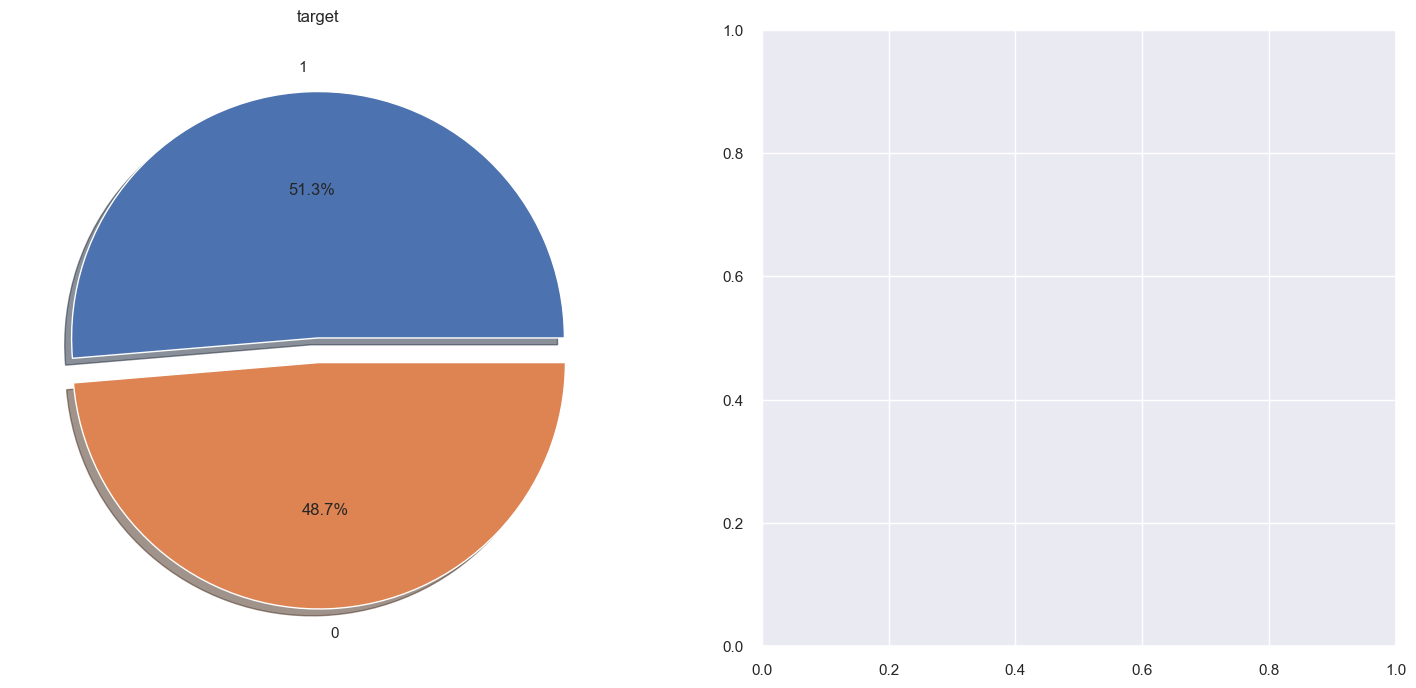

In [83]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=df,ax=ax[1])
ax[1].set_title('target')
plt.show()

<AxesSubplot: ylabel='target'>

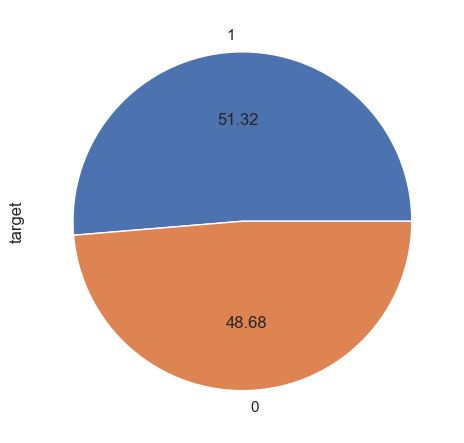

In [84]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

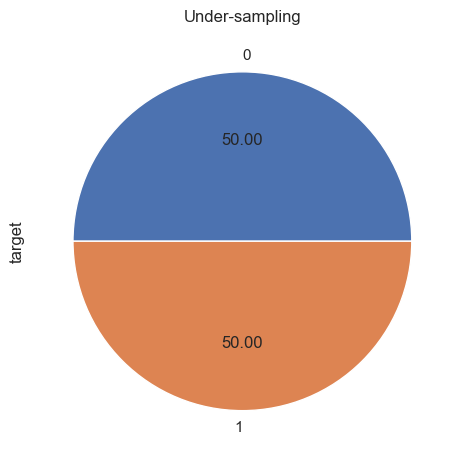

In [85]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [86]:
# Class distribution
y_res.value_counts()

0    499
1    499
Name: target, dtype: int64

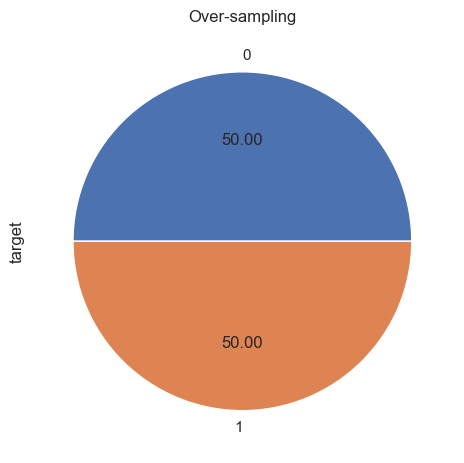

In [87]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
     

In [88]:
y_res.value_counts()

0    526
1    526
Name: target, dtype: int64

In [89]:
#split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=0)

In [90]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [91]:
from sklearn import metrics

print ("Accuracy Score =", metrics.accuracy_score (y_test, y_pred))

Accuracy Score = 0.9902597402597403


In [92]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[145   0]
 [  3 160]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [47]:
dt = DecisionTreeClassifier()


dt.fit(X_train, y_train)

normalized_df_dt_pred = dt.predict(X_test)

Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

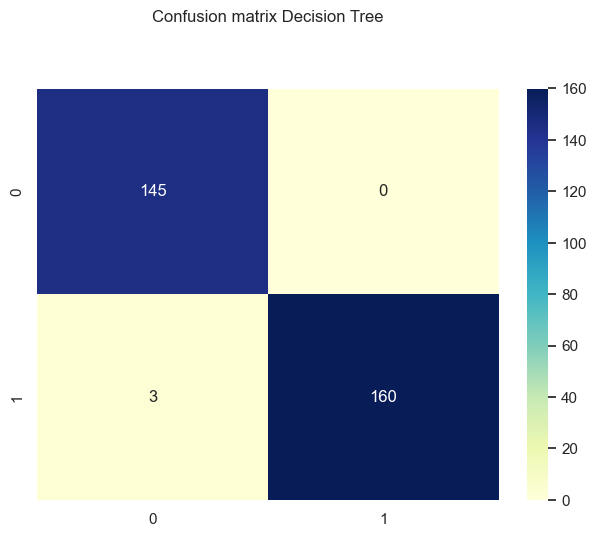

In [48]:
from sklearn.metrics import confusion_matrix
cnf_matrix_dt = confusion_matrix(y_test, normalized_df_dt_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True,cmap="YlGnBu" , fmt='g')
#x.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

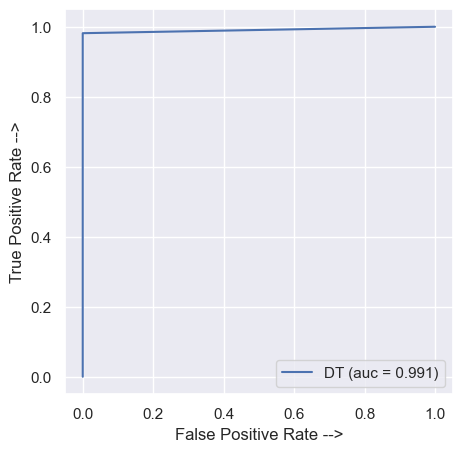

In [49]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr, threshold = roc_curve(y_test, y_pred)
auc_DecisionTreeClassifier= auc(DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(DecisionTreeClassifier_fpr, DecisionTreeClassifier_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_DecisionTreeClassifier)
#plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

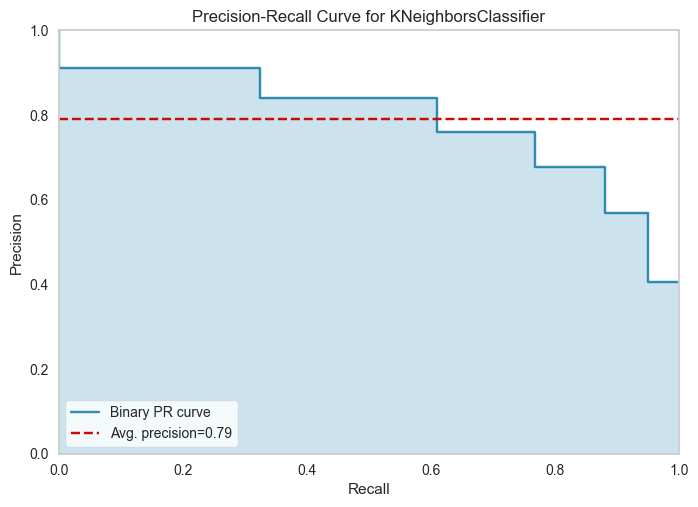

In [50]:
#from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.datasets import load_spam

# Load the dataset and split into train/test splits
X, y = load_spam()

X_train, X_test, y_train, y_test = tts(X, y, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = precision_recall_curve(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

In [51]:
import pandas as pd

# Load the diabetes dataset from a CSV file
diabetes_data = pd.read_csv('diabetes1.csv')

# Define X and y variables
X = diabetes_data.drop('Outcome', axis=1) 
y = diabetes_data['Outcome'] 

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes1.csv'

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, mean_squared_error
import pandas as pd

# read the data from a CSV file
data = pd.read_csv('diabetes1.csv')

# define the input features and output variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# preprocess the data
encoder = ce.OneHotEncoder(cols=['DiabetesPedigreeFunction', 'Age'], drop_invariant=True)
X_encoded = encoder.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# create a KNeighbors classifier
dt = DecisionTreeClassifier()

# perform k-fold cross-validation
scores = cross_val_score(dt, X_scaled, y, cv=10)

# calculate precision, recall, and F1 score
y_pred = cross_val_predict(dt, X_scaled, y, cv=10)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
knn_mse = round(mean_squared_error(y, y_pred), 4)

# print the mean and standard deviation of the accuracy scores
print('Cross-validation accuracy scores:', scores)
print('Mean accuracy:', np.mean(scores))
print('Standard deviation:', np.std(scores))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print("Mean Squared Error     :", dt_mse)


In [ ]:
sns.countplot(x=df['Glucose'])

In [ ]:
sns.countplot(x=df['Insulin'])

In [ ]:
sns.countplot(x=df['BloodPressure'])

In [ ]:
sns.countplot(x=df['DiabetesPedigreeFunction'])

In [ ]:
sns.countplot(x=df['Insulin'])

In [ ]:
sns.pairplot(data=df, hue="BMI")

In [17]:
sns.set()
sns.relplot(x="DiabetesPedigreeFunction", y="BMI", col="Age",
            hue="Insulin", style="Insulin",
            data=df)

In [18]:
sns.set()
sns.relplot(x="DiabetesPedigreeFunction", y="BMI", col="Age",
            hue="Insulin", style="Insulin",
            data=df)

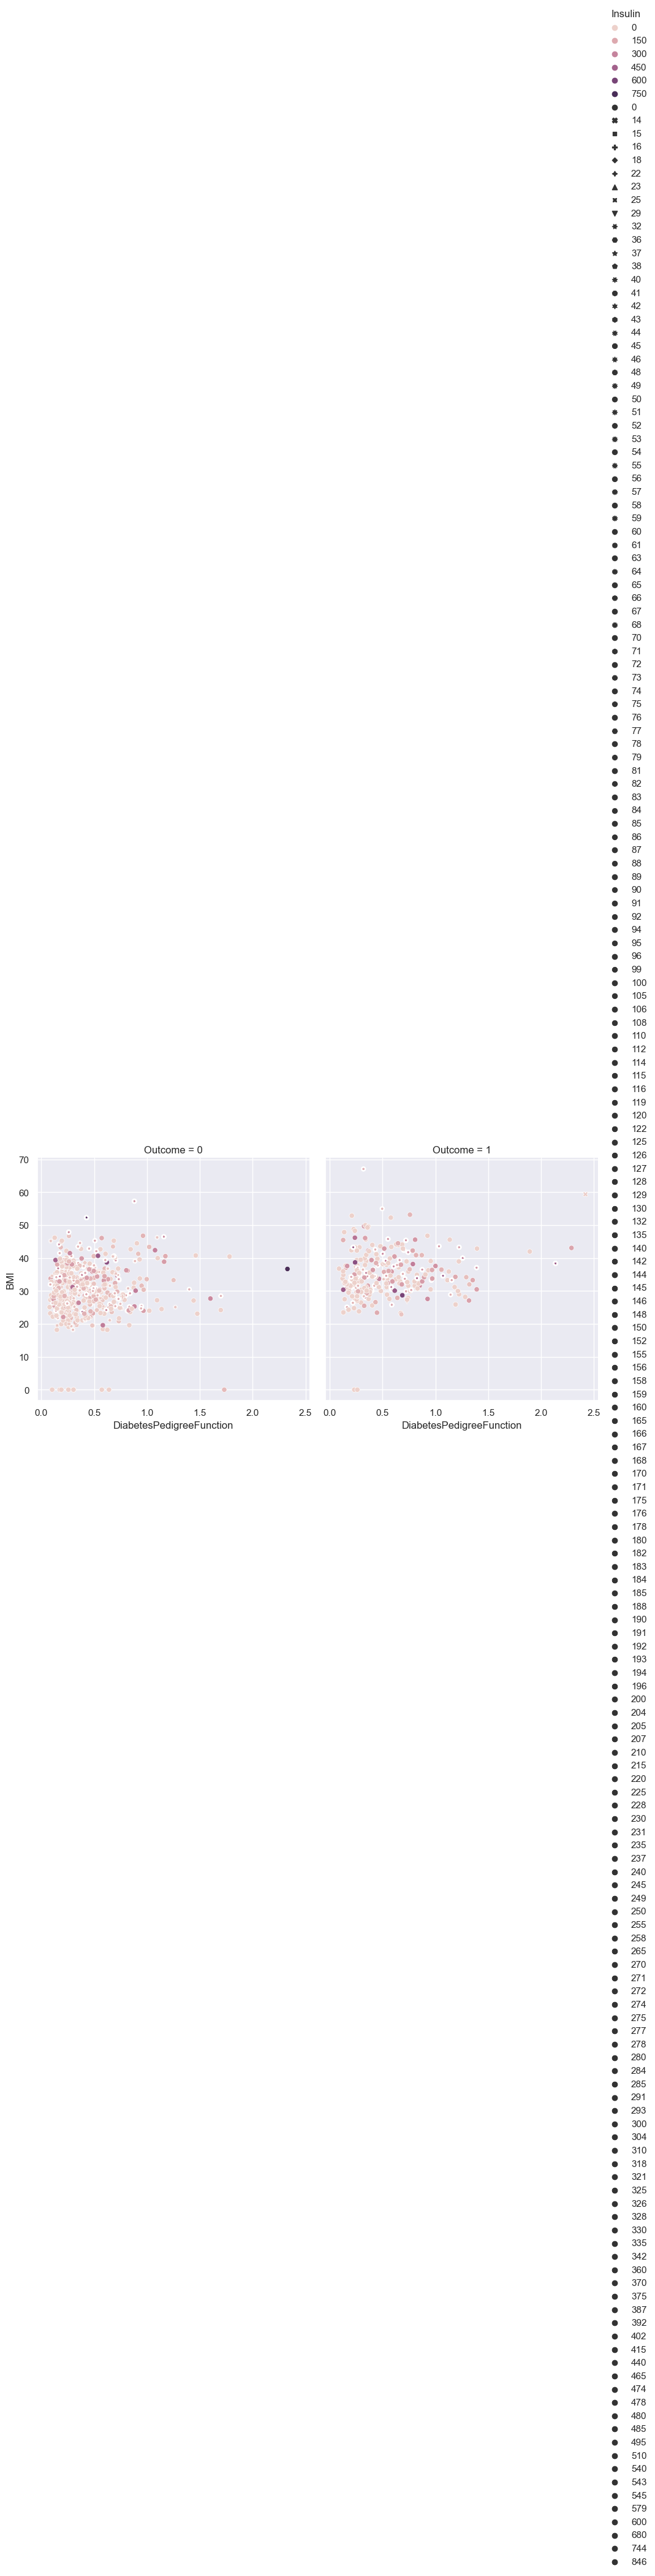

In [19]:
sns.set()
sns.relplot(x="DiabetesPedigreeFunction", y="BMI", col="Outcome",
            hue="Insulin", style="Insulin",
            data=df)